# Простой пайплайн аугментаций

https://albumentations.ai/docs/api_reference/full_reference/

In [1]:
# !wget -q https://github.com/albumentations-team/albumentations_examples/archive/master.zip -O /tmp/albumentations_examples.zip
# !unzip -o -qq /tmp/albumentations_examples.zip -d /tmp/albumentations_examples
# !cp -r /tmp/albumentations_examples/albumentations_examples-master/notebooks/images .
# !echo "Images are successfully downloaded"

In [6]:
#%pip install -U albumentations

In [10]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [11]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

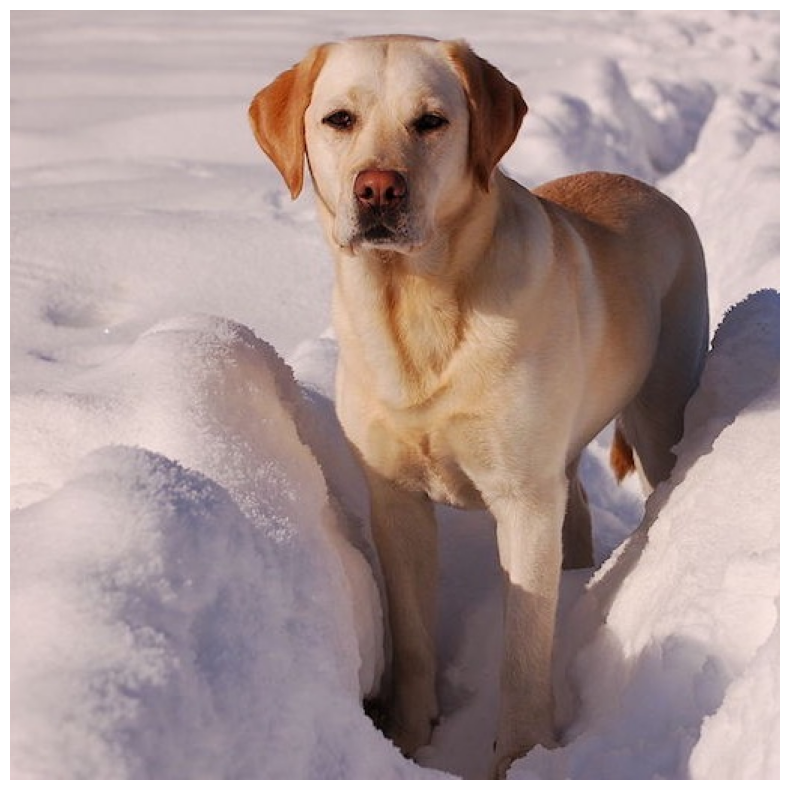

In [12]:
image = cv2.imread('images/image_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

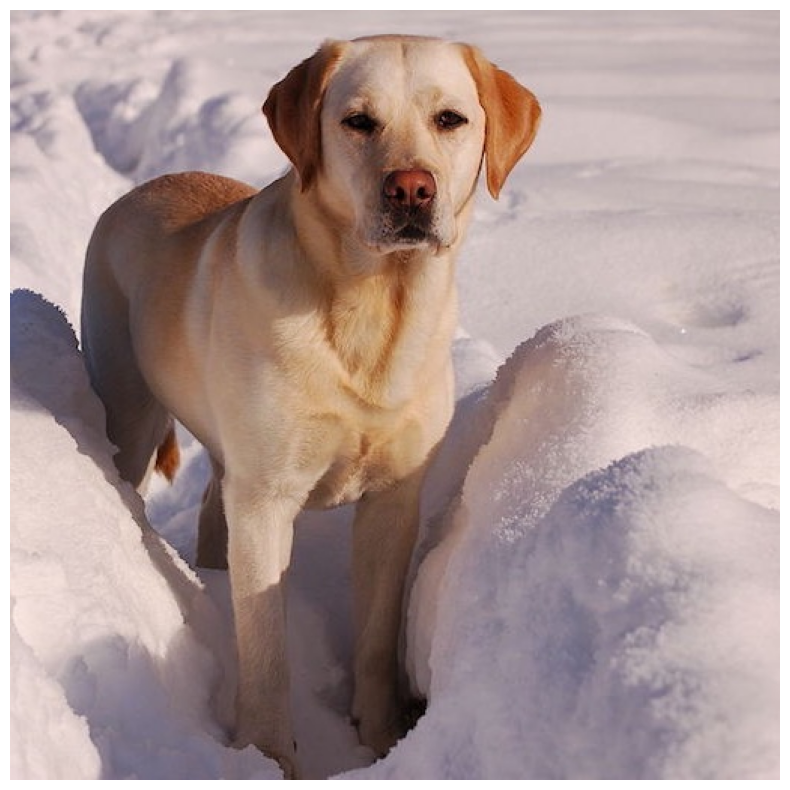

In [19]:
transform = A.HorizontalFlip(p=0.5)
#random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

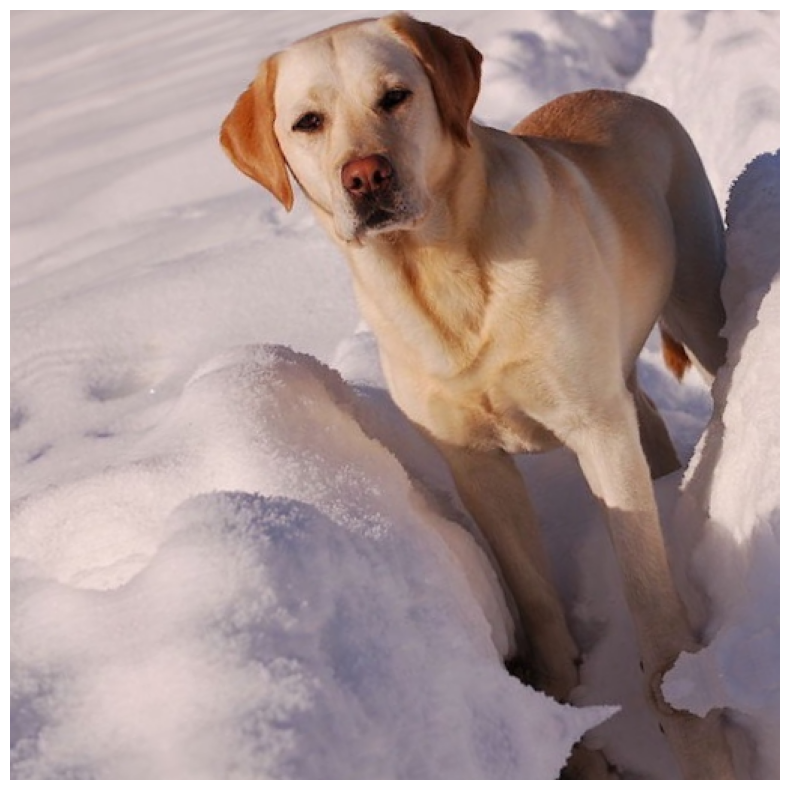

In [24]:
transform = A.ShiftScaleRotate(p=0.5)
#random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

### Пайплайн с использованием Compose `Compose`

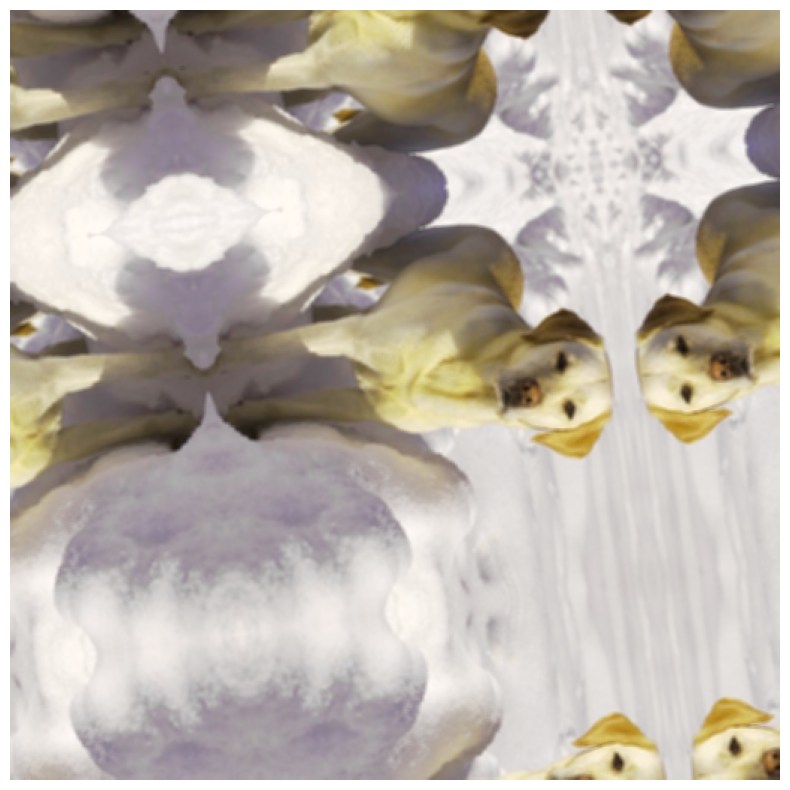

In [26]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
#random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

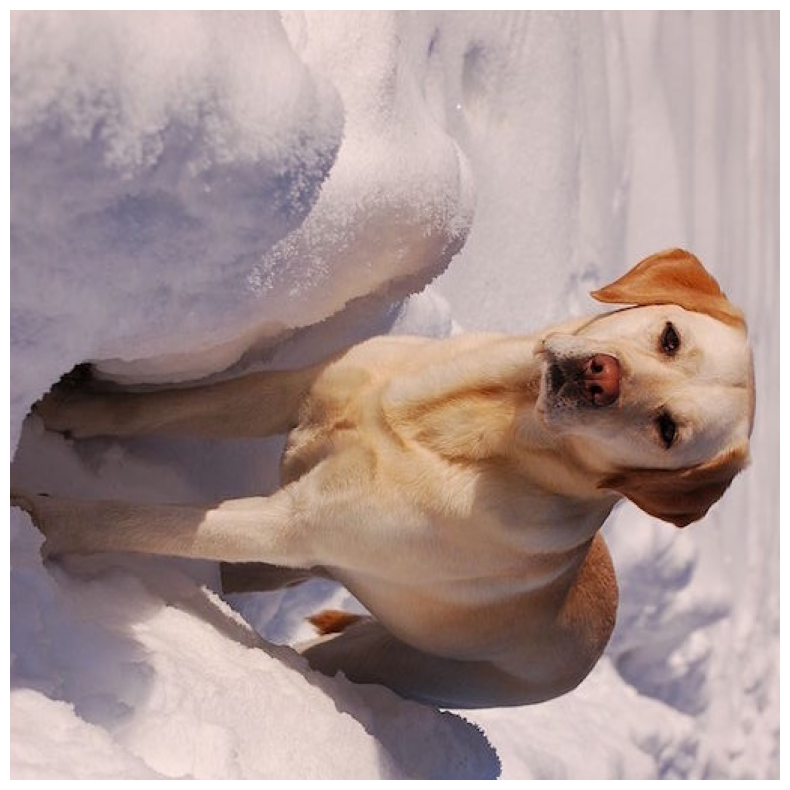

In [29]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.GaussNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.PiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.Sharpen(),
            A.Emboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
#random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)